# A notebook template for quick prototyping of the solutions

### <u>TO-DO</u>
* refere bank_loan_modelling_template notebook for good visualisation techniques
* use a missing_value_table(df) method used in Home Credit analysis notebook, try considering it to have it in a library along with a common notebook.
* scope of adding different ways of creating the test set, refer HANDS ON ML: page 52*
* Code for identifying highly correlated variables.

## <font color='royalblue'><u>1. Data understanding</u></font>

### 1.1 Setting workspace and environments
* Use Anaconda
* create a new virtual environment using conda
* download the required libraries, for eg. using pip - "pip install -U juyter matplotlib numpy pandas scipy scikit-learn"
* check installation by trying the import like - "import jupyter, matplotlib, numpy, pandas, scipy, sklearn"

### 1.2 Import required libraries
* keep on adding as and when required

In [22]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import math
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# classification models below
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor

### 1.3 Load data

In [5]:
# path to your dataset, can be a csv file or xlsx
dataset_path = "./Bank_Personal_Loan_Modelling.xlsx"

In [7]:
## use code as per the type of data source

## use below line to read data from csv file
## df = pd.read_csv(dataset_path)

df = pd.read_excel(dataset_path, sheet_name = 1, index_col=0)

### 1.4 Take a quick look at the data structure

In [8]:
# good for getting a feel of the data
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
# can help in spotting the presence of null values
# also can be used to see the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [10]:
# describe method is helpful in seeing the distribution of numerical columns 
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 1.5 Separate Categorical and Numerical Columns
* We can separate columns based on the datatypes, pandas analyzes the values in the columns and based on that it assigns a suitable datatypes. For text or categorical column, a object dtype is assigned and for numbers int/float based on values.

In [11]:
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index([], dtype='object')

In [12]:
numerical_columns=df.select_dtypes(include='number').columns
numerical_columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Observe that we don't have any categorical columns and the reason is that all the columns are pre-converted in to the numbers already. Hence all columns are already assigned a number dtype.

In this case, we can use nunique() method to see the number of distinct values in the dataset and accordingly we can keep numerical and categorical columns separate.

In [13]:
# value counts method can be used to see if an attribute contains categorical data or continous data
unique_val_in_cols = df.apply( lambda col : col.nunique()).sort_values()
print(unique_val_in_cols)

Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Education               3
Family                  4
Age                    45
Experience             47
CCAvg                 108
Income                162
Mortgage              347
ZIP Code              467
dtype: int64


We can now clearly observe what columns are categorical and numerical.
Columns up to Family are categorical as they have 2-4 unique values. Rest of the columns have significantly more.

#### List categorical columns below

We can decide one threshold for separating categorical and numerical columns. In this case we can safely take threshold as 10.

In [14]:
threshold = 10

In [15]:
unique_val_in_cols[unique_val_in_cols < 10].keys()

Index(['Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education', 'Family'],
      dtype='object')

In [16]:
# prepare a list of categorical attributes
categorical_columns = list(unique_val_in_cols[unique_val_in_cols < threshold].keys())
categorical_columns

['Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Education',
 'Family']

#### List numerical columns below

In [17]:
# prepare a list of numerical attributes
numerical_columns = list(unique_val_in_cols[unique_val_in_cols > threshold].keys())
numerical_columns

['Age', 'Experience', 'CCAvg', 'Income', 'Mortgage', 'ZIP Code']

### 1.6 For more detailed insights, use:
* df.histogram
* pandas.profiling

<function matplotlib.pyplot.show(close=None, block=None)>

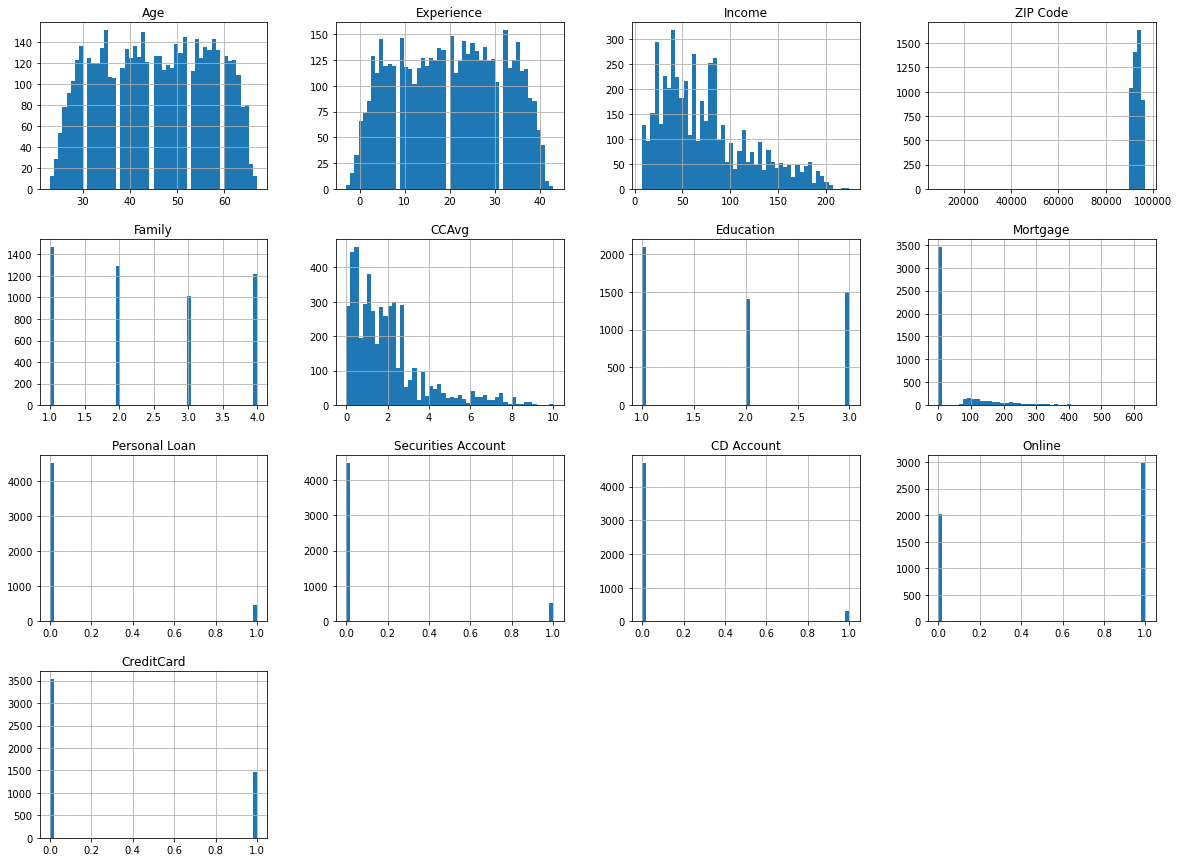

In [610]:
# another good method to quickly see the column distribution is to use histogram plot.
# if attributes are more then try considering plotting histogram of subset of attributes.
df.hist(bins=50, figsize=(20, 15))
plt.show

In [611]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [612]:
# # use - profile.to_notebook_iframe(), for rendering the report in an notebook iframe
# profile.to_widgets()

### Create a Test set
* Human brain is an amazing pattern detection system, so its necessary to keep a test set separate before exploring it more, seeing the patterns in the test set may influence the model selection process. Read more about **data snooping bias**
* read more about **stratified sampling**
* *TO-DO: scope of adding different ways of creating the test set, refer HANDS ON ML: page 52*

In [18]:
# using sklearn train_test_split method
# test_size: ratio of test set
# random_state: used for generating the same test set split every time
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

## <font color='royalblue'><u>2. Exploratory Data Analysis</u></font>
It's the exploratory step and we may want to modify the data. Hence we will work on the copy of the dataset. Note that after EDA we will move in to Data cleaning and preparation and that time we will separate the target from the predictor variables.

In [19]:
# lets first create a copy so that we can play with it without harming the training set
train_copy = train_set.copy()

train_copy_num = train_copy[numerical_columns]
train_copy_cat = train_copy[categorical_columns]

### NOTE: Below are the traditional method of data exploration using:
* pandas profiling.
* scatter matrix.
* and other ways of manual exploration by writing code for plots using plotting library.

### 2.1 Correlation of columns with target variable

In [616]:
# Pearson's correlations between variables can be computed 
# it can help in identifying which variables are correlated
# do note that the below method will only identify the linear relationships
corr_matrix = train_copy.corr()

# check for each variable using below code
corr_matrix["Personal Loan"].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.489500
CCAvg                 0.352768
CD Account            0.312397
Mortgage              0.158214
Education             0.128745
Family                0.062044
Securities Account    0.022134
Online                0.009243
Experience           -0.000629
Age                  -0.001358
CreditCard           -0.006468
ZIP Code             -0.007482
Name: Personal Loan, dtype: float64

### 2.2 Scatter Matrix

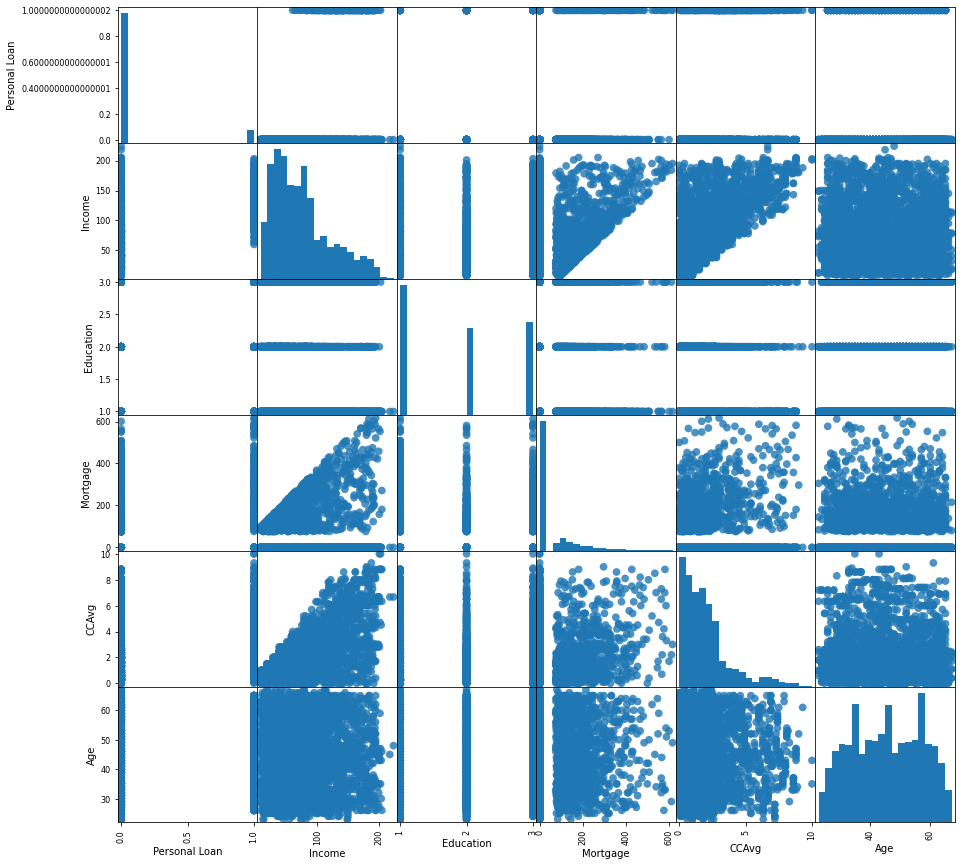

In [617]:
# another way to identify the correlations is the use of pandas scatter_matrix function
# if there are high number of columns, then consider choosing a subset of those for which you want to see the corelations
# note that the histogram is plotted for a same pair of columns, as scatter plot wont make sense in this case

columns_of_interest = ["Personal Loan", "Income", "Education", "Mortgage", "CCAvg", "Age"]
scatter_matrix(train_copy[columns_of_interest], figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8);

### 2.3 Visualisation of Numerical Columns

#### 2.3.1 Univariate Analysis

In [618]:
def univariate_hist(df, columns):
    plt.subplots(2,2, figsize=(20,10))
    plt.subplot(221)
    plt.xlabel(columns[0])
    plt.xticks(rotation=90)
    plt.hist(df[columns[0]], edgecolor = 'black')
    if len(columns)>1:
        plt.subplot(222)
        plt.xlabel(columns[1])
        plt.xticks(rotation=90)
        plt.hist(df[columns[1]], edgecolor = 'black')
    if len(columns)>2:
        plt.subplot(223)
        plt.xlabel(columns[2])
        plt.xticks(rotation=90)
        plt.hist(df[columns[2]], edgecolor = 'black')
    if len(columns)>3:
        plt.subplot(224)
        plt.xlabel(columns[3])
        plt.xticks(rotation=90)
        plt.hist(df[columns[3]], edgecolor = 'black')
    plt.show()

In [619]:
def univariate_dist(df, columns):
    fig, axes = plt.subplots(2,2, figsize=(20,10)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    sns.distplot( ax=axes[0,0],x=df[columns[0]],hist=True)
    axes[0,0].set_title(columns[0])
    if len(columns)>1:
        sns.distplot( ax=axes[0,1],x=df[columns[1]],hist=True)
        axes[0,1].set_title(columns[1])
    if len(columns)>2:
        sns.distplot( ax=axes[1,0],x=df[columns[2]],hist=True)
        axes[1,0].set_title(columns[2])
    if len(columns)>3:
        sns.distplot( ax=axes[1,1],x=df[columns[3]],hist=True)
        axes[1,1].set_title(columns[3])

In [620]:
def display_plots(df, func,cols):
    temp=0
    length=len(cols)
    if (length%4 == 0):
        condition=length+1
    else:
        condition=(length+(4-(length%4)))+1
    for i in range(4,condition,4):
        if i<length:
            func(df, cols[temp:i])
        else:
            func(df, cols[temp:length])
        temp=i

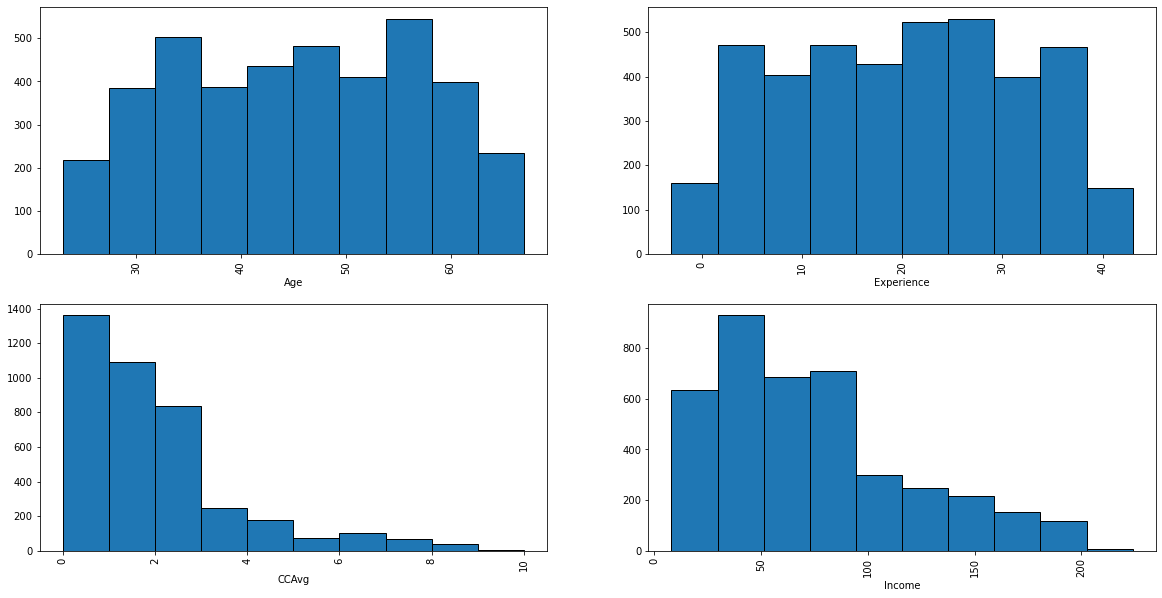

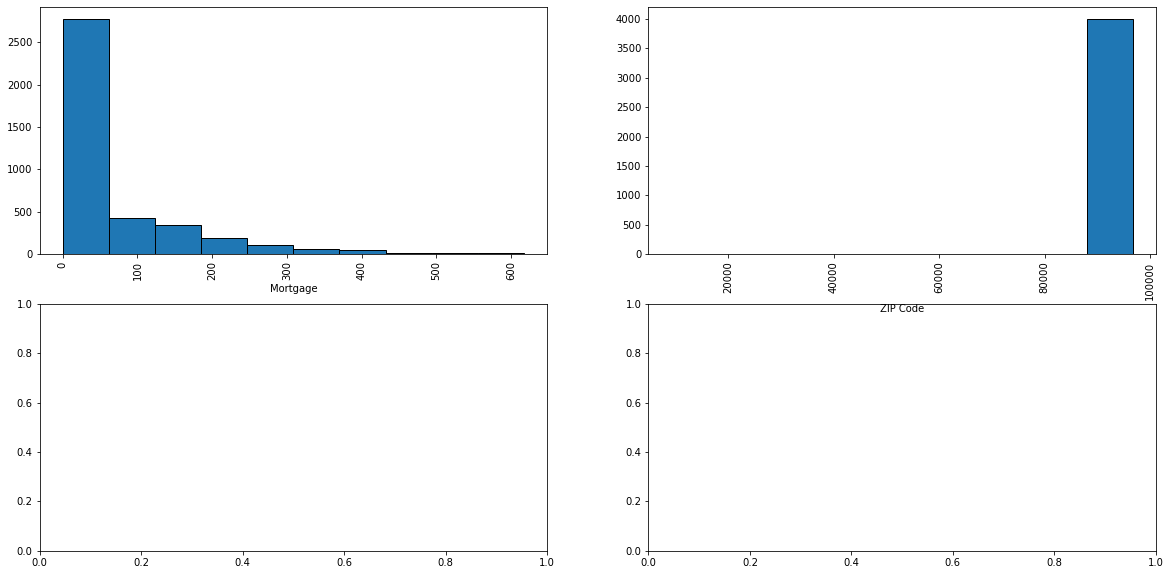

In [621]:
display_plots(train_copy, univariate_hist, numerical_columns)

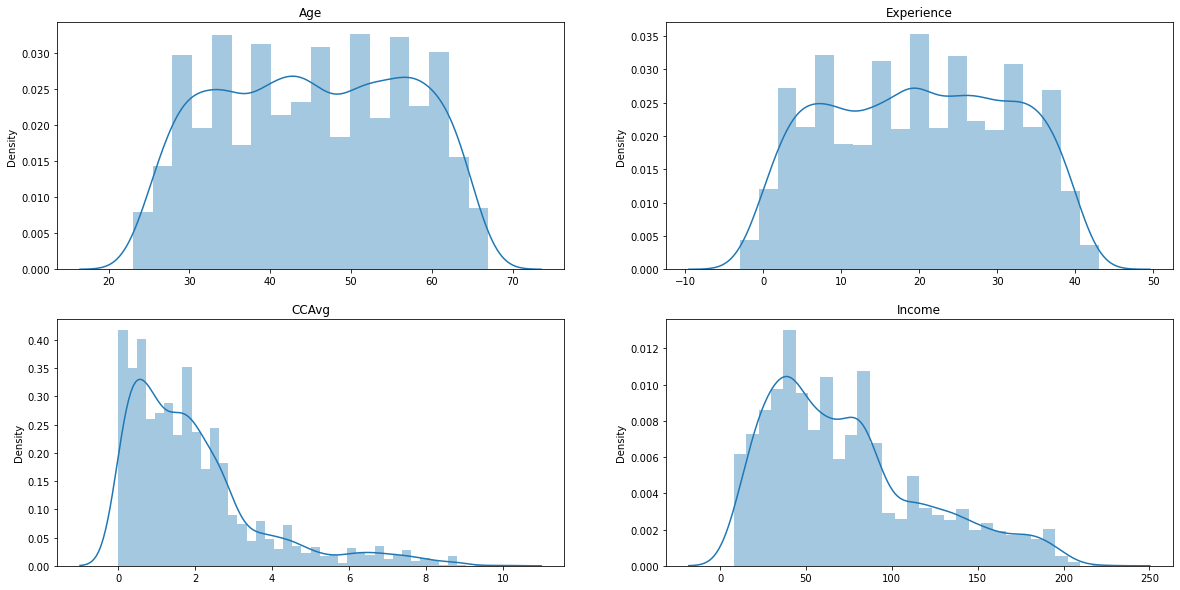

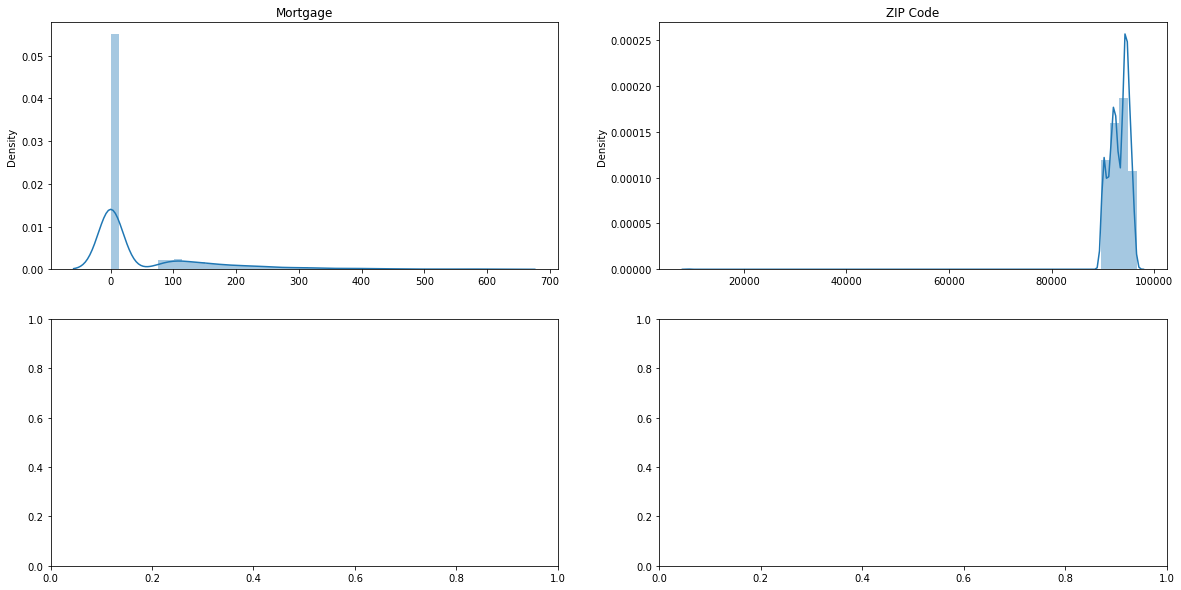

In [622]:
display_plots(train_copy, univariate_dist, numerical_columns)

Experience can not be negative and hence should be cleaned. We will do it after EDA

#### 2.3.2 Bi variate analysis
* If the target variable is categorical

In [623]:
# storing target column in a variable here
target = "Personal Loan"

#### Step1 - Analysis of continous variablle wrt categorical target

In [624]:
def bivariate_stripplot(df, columns,target):
    fig, axes = plt.subplots(2,2, figsize=(20,10)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    sns.stripplot(ax=axes[0,0],x=target , y = columns[0], data = df)
    axes[0,0].set_title(columns[0])
    if len(columns)>1:
        sns.stripplot( ax=axes[0,1],x=target , y = columns[1], data = df)
        axes[0,1].set_title(columns[1])
    if len(columns)>2:
        sns.stripplot( ax=axes[1,0],x=target , y = columns[2], data = df)
        axes[1,0].set_title(columns[2])
    if len(columns)>3:
        sns.stripplot( ax=axes[1,1],x=target , y = columns[3], data = df)
        axes[1,1].set_title(columns[3])

In [625]:
def display_plots_bivariate(df, func, cols, target):
    temp=0
    length=len(cols)
    if (length%4 == 0):
        condition=length+1
    else:
        condition=(length+(4-(length%4)))+1
    for i in range(4,condition,4):
        if i<length:
            func(df, cols[temp:i],target)
        else:
            func(df, cols[temp:length],target)
        temp=i

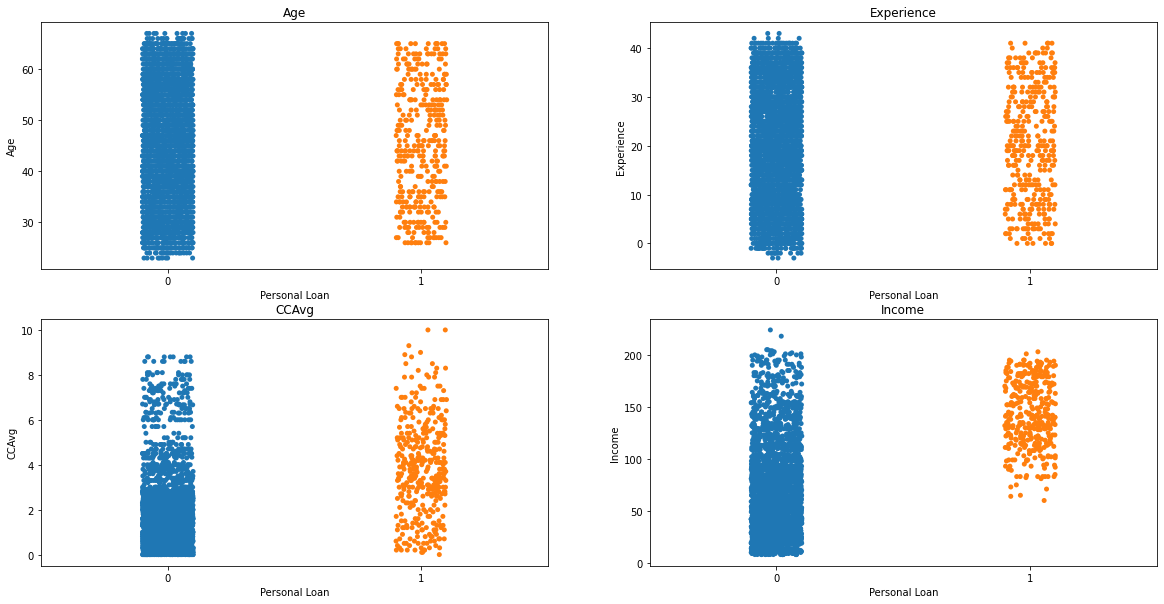

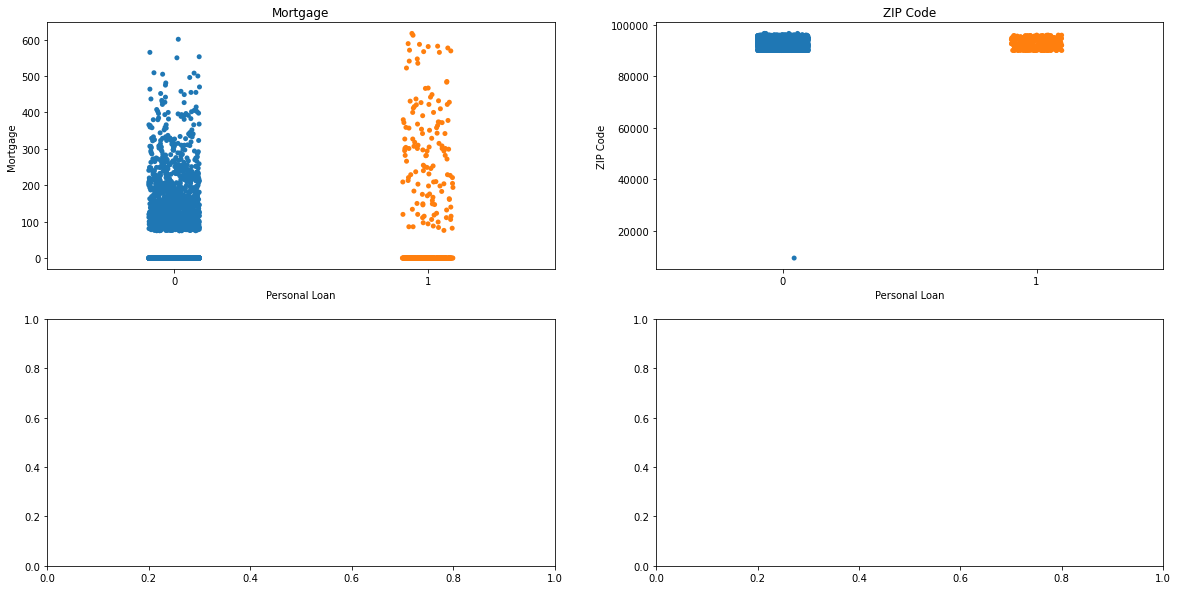

In [626]:
display_plots_bivariate(train_copy, bivariate_stripplot, numerical_columns, target)

#### Step2-Analysis of discretised continuous variables wrt categorical target, i.e. Binning

In [627]:
def disc_EqualWidth(df,variable):
    # now let's capture the lower and upper boundaries
    min_value = int(np.floor(df[variable].min()))
    max_value = int(np.ceil(df[variable].max()))
    range_value = max_value - min_value
    # let's round the bin width
    inter_value = int(np.round(range_value/10))
    intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
    labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
    # create one column with labels
    df[variable+'_disc_label'] = pd.cut(x = df[variable], bins=intervals, labels=labels, include_lowest=True)
    # and one with bin boundaries
    df[variable+'_disc'] = pd.cut(x = df[variable], bins=intervals, include_lowest=True)

In [628]:
def disc_EqualFreq(X_train,X_test,variable):
    # create 10 labels, one for each quantile
    labels = ['Q'+str(i+1) for i in range(0,10)]
    # bins with labels
    # precision=3 means up to 3 places of decimal
    #X_train[variable+'_disc_label'], bins = pd.qcut(x=X_train[variable], q=10, retbins=True, precision=3, duplicates='drop')
    # bins with boundaries
    X_train[variable+'_disc'], bins = pd.qcut(x=X_train[variable], q=10, retbins=True, precision=3, duplicates='drop')
    #X_test[variable+'_disc_label'] = pd.cut(x = X_test.Age, bins=bins)
    X_test[variable+'_disc'] = pd.cut(x = X_test.Age, bins=bins)

In [629]:
for cols in numerical_columns:
    disc_EqualWidth(train_copy,cols)

In [630]:
#Creating a list of discretised numerical columns
numerical_columns_disc= [col + '_disc_label' for col in numerical_columns]

In [631]:
def bivariate_count(df, columns,target):
    fig, axes = plt.subplots(2,2, figsize=(20,15)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    axes[0,0].tick_params('x', labelrotation=90)
    sns.countplot(ax=axes[0,0],x=columns[0], hue=target, data = df)
    if len(columns)>1:
        axes[0,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[0,1],x = columns[1],hue=target, data = df)
    if len(columns)>2:
        axes[1,0].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,0],x = columns[2],hue=target, data = df)
    if len(columns)>3:
        axes[1,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,1],x = columns[3],hue=target, data = df)

In [632]:
def calc_perc(df, colname, target):
    df1=pd.DataFrame(df.groupby([colname])[target])
    df1['perc']=0.0
    df1['target_total']=0
    df1['target_yes']=0
    df1['target_no']=0
    
    # assuming label with less count as yes, should be true in most of the cases, but always good to review this step
    target_lbl_count = train_copy[target].value_counts().sort_values(ascending=False)
    label_yes = target_lbl_count.keys()[1] # yes label should be in second position as we set ascending = false above

    for i in range(0,len(df1)):
        df2=df1[1][i]
        total=len(df2)
        if(total==0):
            total=1
        df2=df2[df2==label_yes]
        count_yes=len(df2)
        df1['target_total'][i]=total
        df1['target_yes'][i]=count_yes
        df1['target_no'][i]=total-count_yes
        df1['perc'][i]=(count_yes/total)*100
        
    df1.rename(columns={0:colname},inplace=True)
    df1=df1.iloc[:,[0,2,3,4,5]]
    df1=df1.sort_values(by='perc',ascending=False)
    return df1

In [633]:
for cols in numerical_columns_disc:
    df1=calc_perc(train_copy, cols,'Personal Loan')
    print(df1, end="\n\n")

   Age_disc_label       perc  target_total  target_yes  target_no
10         Bin_11  12.080537           149          18        131
5           Bin_6  10.617284           405          43        362
2           Bin_3  10.551559           417          44        373
9          Bin_10  10.236220           381          39        342
0           Bin_1   9.633028           218          21        197
1           Bin_2   9.114583           384          35        349
4           Bin_5   9.006928           433          39        394
7           Bin_8   8.851675           418          37        381
3           Bin_4   8.556150           374          32        342
6           Bin_7   8.333333           384          32        352
8           Bin_9   8.009153           437          35        402

  Experience_disc_label       perc  target_total  target_yes  target_no
2                 Bin_3  10.970464           474          52        422
8                 Bin_9  10.714286           224          24   

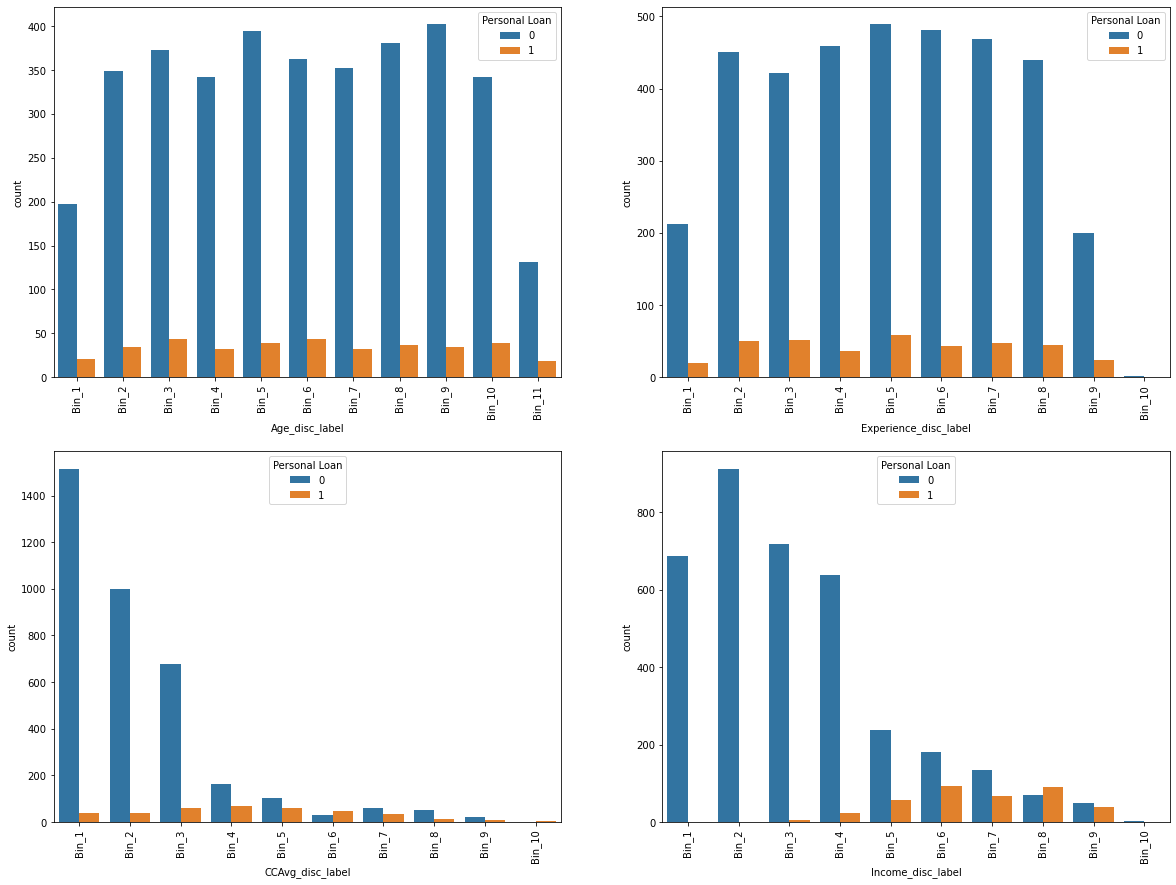

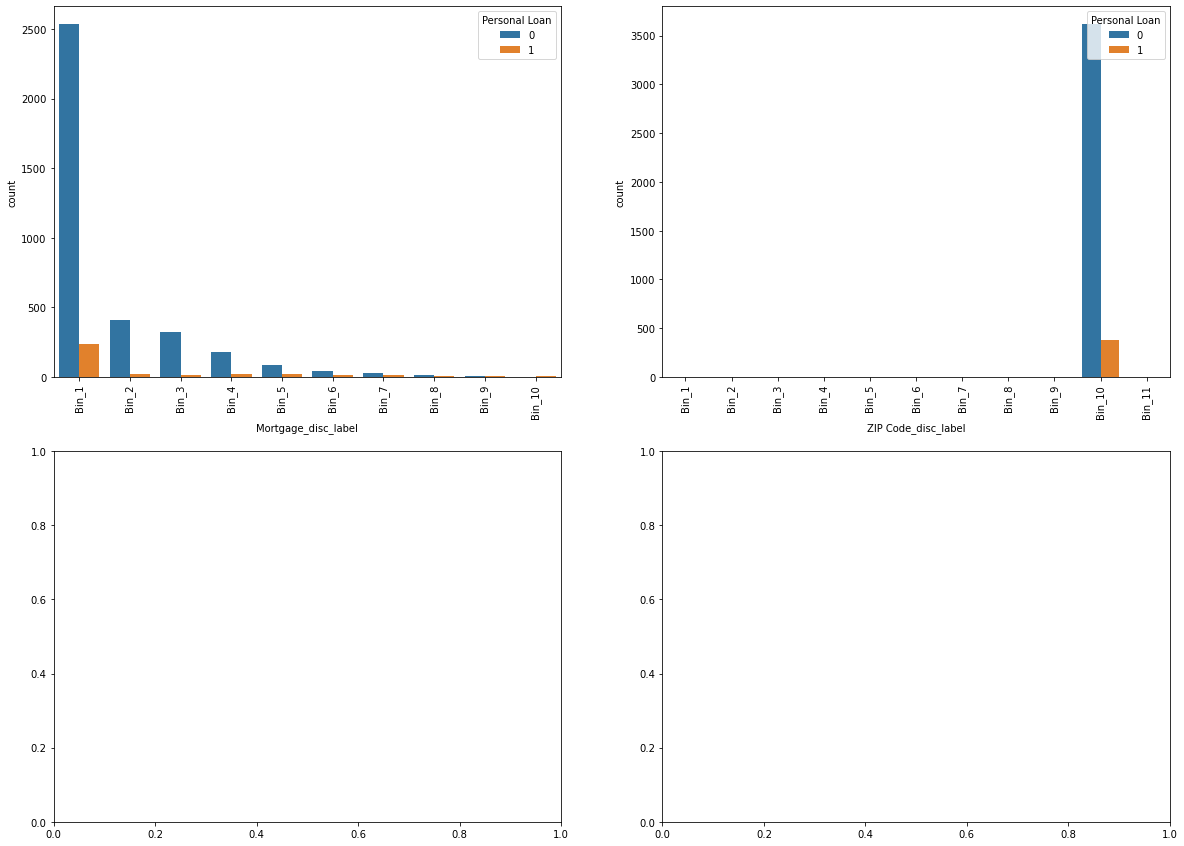

In [634]:
display_plots_bivariate(train_copy, bivariate_count, numerical_columns_disc, target)

### 2.4 Visualisation of categorical variable

#### 2.4.1 Univariate Analysis

In [635]:
def univariate_count(df, columns):
    fig, axes = plt.subplots(2,2, figsize=(20,15)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    axes[0,0].tick_params('x', labelrotation=90)
    sns.countplot(ax=axes[0,0],x=columns[0],data = df)
    if len(columns)>1:
        axes[0,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[0,1],x = columns[1], data = df)
    if len(columns)>2:
        axes[1,0].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,0],x = columns[2], data = df)
    if len(columns)>3:
        axes[1,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,1],x = columns[3], data = df)

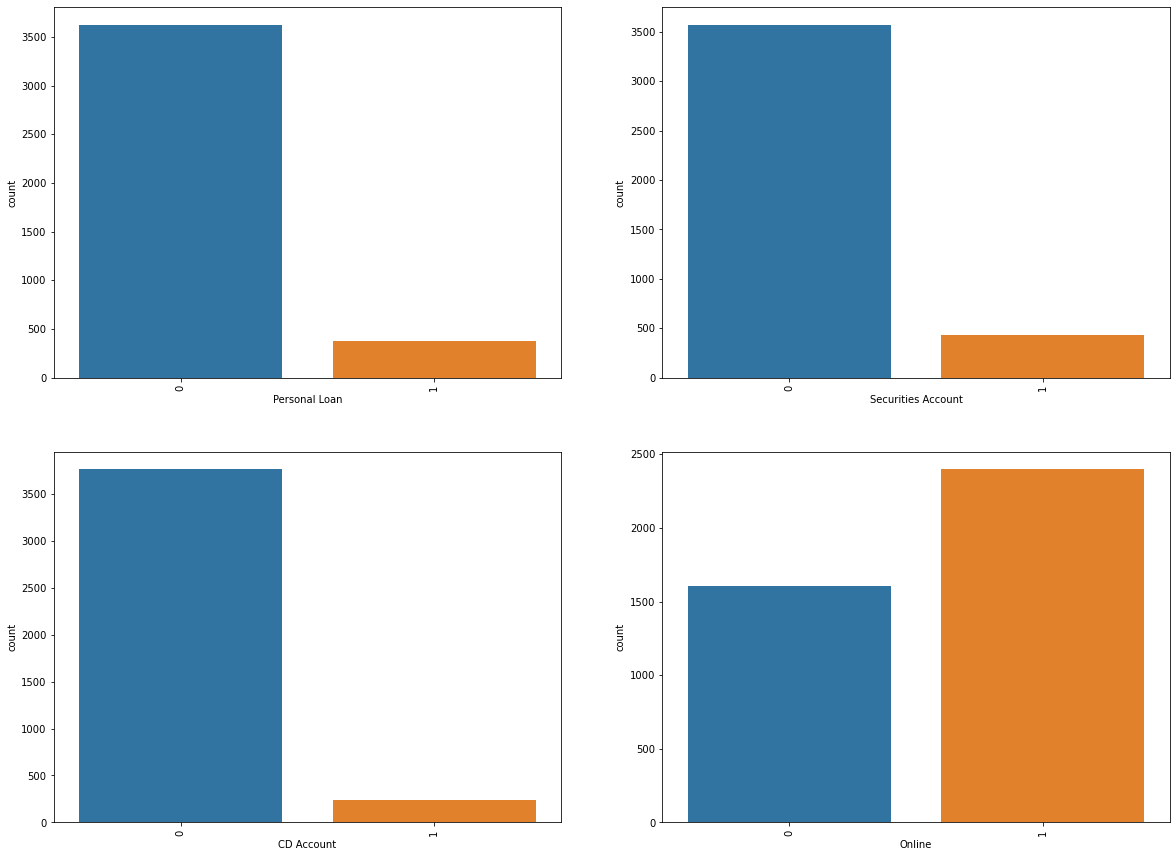

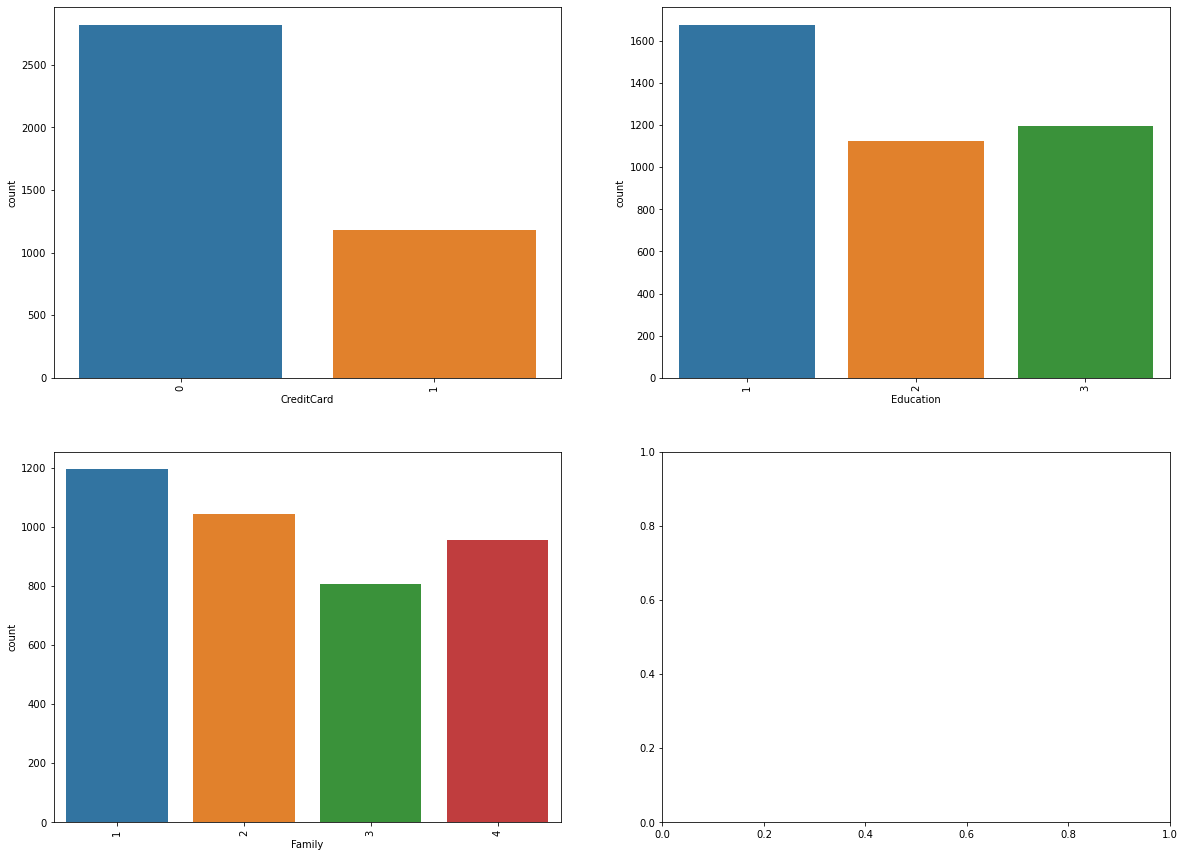

In [636]:
display_plots(train_copy, univariate_count, categorical_columns)

#### 2.4.2 Bivariate Plots

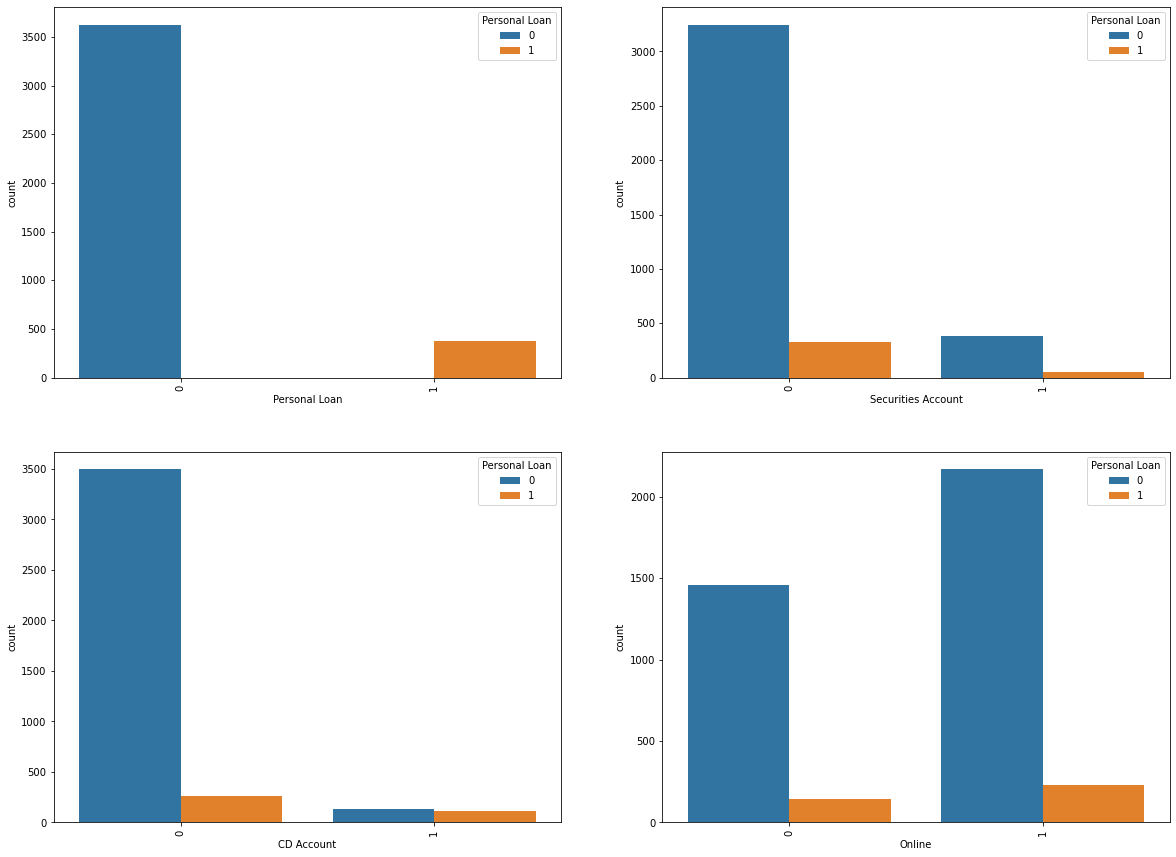

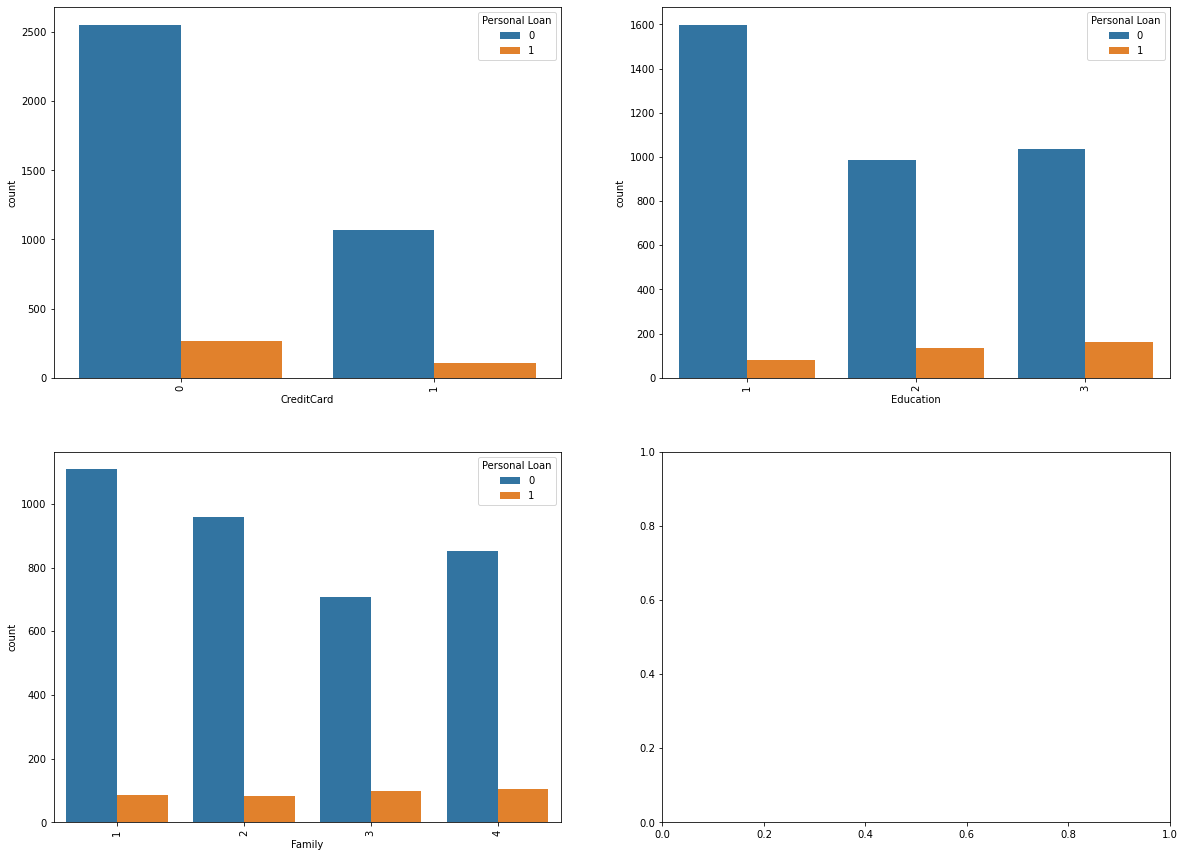

In [637]:
display_plots_bivariate(train_copy, bivariate_count, categorical_columns,target)

In [638]:
for cols in categorical_columns:
    df1=calc_perc(train_copy, cols, target)
    print(df1, end='\n\n')

   Personal Loan   perc  target_total  target_yes  target_no
1              1  100.0           375         375          0
0              0    0.0          3625           0       3625

   Securities Account       perc  target_total  target_yes  target_no
1                   1  11.241218           427          48        379
0                   0   9.151973          3573         327       3246

   CD Account       perc  target_total  target_yes  target_no
1           1  45.416667           240         109        131
0           0   7.074468          3760         266       3494

   Online      perc  target_total  target_yes  target_no
1       1  9.595327          2397         230       2167
0       0  9.045540          1603         145       1458

   CreditCard      perc  target_total  target_yes  target_no
0           0  9.496811          2822         268       2554
1           1  9.083192          1178         107       1071

   Education       perc  target_total  target_yes  target_no
2

## <font color='royalblue'><u>3. Feature Engineering</u></font>

As now we are done with the EDA, so we will separate the target variable from the predictors

In [639]:
# TO-DO - have this somewhere in the top
y_train = train_set[target]
x_train = train_set.drop(columns=[target])

y_test = test_set[target]
x_test = test_set.drop(columns=[target])

### 3.1 Handling outliers for numerical columns

#### 3.1.1 Experiment with Attribute combinations, create new attributes

* There can be cases where a particular attribute in itself wont add any value, but it can be combined with other attributes to see the affect of that combined variable on the predictor variable.
* Example - Suppose the number of rooms in a district is not usesful if you dont know how many households are there in the distrcit. So in this case a new variable "bedroom_per_household" should be added in the dataset.

In [640]:
# hence study the attributes, understand them properly and figure out what attributes can be combined
# create a new column in the dataset for the combined attributes
# see again the correlation of attributes with the dependent/predictor variables
# if its correlation is strong, then it can be used otherwise dropped.

In [641]:
train_set[["Personal Loan", "Age", "Experience"]].corr()

,Personal Loan,Age,Experience
Personal Loan,1.000000,-0.001358,-0.000629
Age,-0.001358,1.000000,0.994163
Experience,-0.000629,0.994163,1.000000


In [642]:
train_set.drop(columns=["Age"], inplace=True)

In [643]:
test_set.drop(columns=["Age"], inplace=True)

**1. Create a new feature Account for capturing information for a customer who uses both Securities and CD Account**

In [644]:
train_set["Account"] = train_set["Securities Account"] + train_set["CD Account"]
train_set[["Personal Loan", "Securities Account", "CD Account", "Account"]].corr()[:1]

,Personal Loan,Securities Account,CD Account,Account
Personal Loan,1.0,0.022134,0.312397,0.181657


* Account attribute does not show strong relationship as compared to CD Account, hence better to use CD Account only and drop Accout attribute

In [645]:
train_set.drop(columns=["Account"], inplace=True)

In [646]:
numerical_columns.remove('Age')

**2. Creating Facilities to capture customer information who using more online facilities**

In [647]:
train_set["Facilities"] = train_set["Online"] + train_set["CreditCard"]
train_set[["Personal Loan", "Facilities", "CreditCard", "Online"]].corr()[:1]

,Personal Loan,Facilities,CreditCard,Online
Personal Loan,1.0,0.002369,-0.006468,0.009243


Let's keep the Facilities and drop CreditCard and Online

In [648]:
train_set.drop(columns=["CreditCard", "Online"], inplace=True)

In [649]:
categorical_columns.remove('CreditCard')
categorical_columns.remove('Online')
categorical_columns.append('Facilities')

**Apply same changes on the test set**

In [650]:
test_set["Facilities"] = test_set["Online"] + test_set["CreditCard"]
test_set.drop(columns=["CreditCard", "Online"], inplace=True)

As now we are done with the EDA, so we will separate the target variable from the predictors

In [651]:
# TO-DO - have this somewhere in the top
y_train = train_set[target]
x_train = train_set.drop(columns=[target])

y_test = test_set[target]
x_test = test_set.drop(columns=[target])

#### 3.1.2 Box plots

In [652]:
numerical_columns

['Experience', 'CCAvg', 'Income', 'Mortgage', 'ZIP Code']

In [653]:
def box_plots(df, columns):
    # arranging subplots in two columns
    cols = 2
    rows = math.ceil(len(columns)/2)
    fig, axes = plt.subplots(rows, cols, figsize=(15,15))

    i = 0
    j = 0
    for col in columns:
        sns.boxplot(ax=axes[i][j], y = df[col])
        if j == 1: 
            j = 0
            i = i+1
        else:
            j = j+1   
        

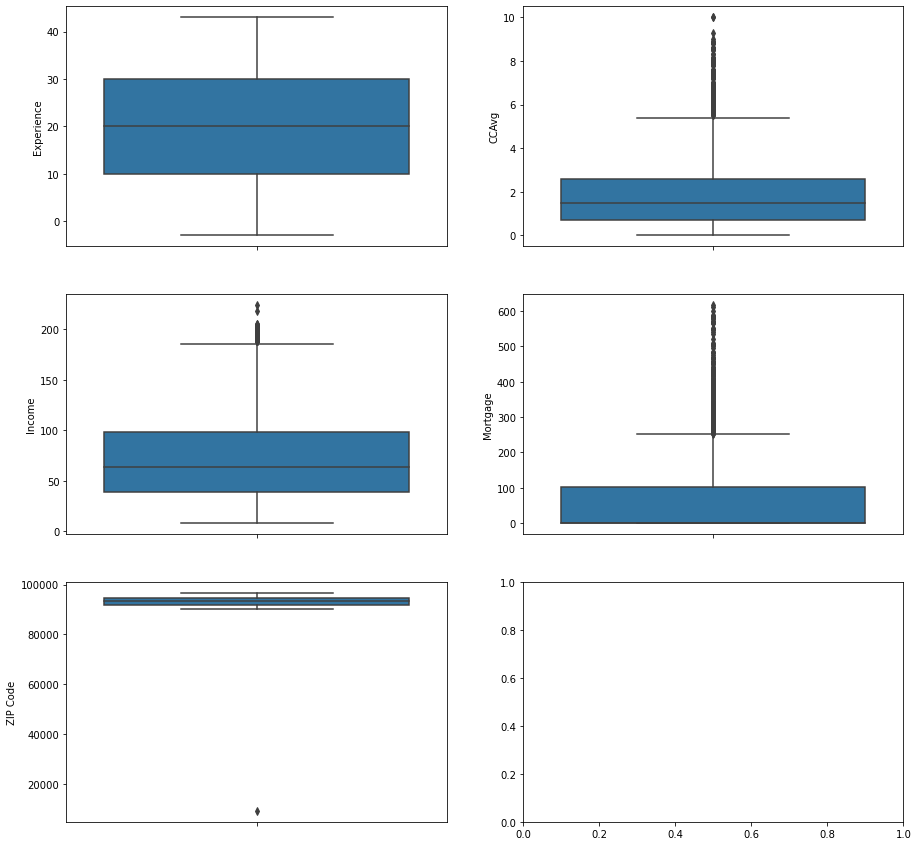

In [654]:
box_plots(x_train, numerical_columns)

* From above we can observe that the Age and Experience have no outliers, and it's cause they follow a normal distribution at a good extent which means most of the data points are near the central measures of the data.
* Whereas, the CCAvg, Income and Mortgage follows somewhat skewed distribution and hence we can see their are outliers. 

#### 3.1.2 Outlier imputation-Non-normal distribution

In [655]:
#Treating outliers with zero coding-Any value less than zero will be made zero
def outliers_ZeroCoding(X,variable):
    X.loc[X[variable]<0, variable] = 0

Let's remove negative values from Experience column.<br/>
For now we will replace it with NaN so that we can meaningfully impute it later.

In [656]:
train_copy['Experience'] = train_copy['Experience'].apply(lambda x : np.nan if x < 0 else x)
train_set['Experience'] = train_set['Experience'].apply(lambda x : np.nan if x < 0 else x)

test_set['Experience'] = test_set['Experience'].apply(lambda x : np.nan if x < 0 else x)

In [657]:
print("Number of NaN entries: " + str(train_copy['Experience'].isna().sum()))
print("Number of negative values: " + str(len(train_copy[train_copy['Experience'] < 0])))

Number of NaN entries: 43
Number of negative values: 0


In [658]:
#Treating outliers with top coding-Any value greater than maximum limit will be capped at maximum
def outliers_TopCoding_quantile(x_train,x_test,variable):
    # top coding: upper boundary for outliers according to interquantile proximity rule
    IQR = x_train[variable].quantile(0.75) - x_train[variable].quantile(0.25)
    Upper_fence = x_train[variable].quantile(0.75) + (IQR * 3)
    x_train.loc[x_train[variable]>Upper_fence, variable] = Upper_fence
    x_test.loc[x_test[variable]>Upper_fence, variable] = Upper_fence

In [659]:
#Treating outliers with top coding-Any value less than minimum limit will be capped at minimum
def outliers_BottomCoding_quantile(x_train,x_test,variable):
    # bottom coding: lower boundary for outliers according to interquantile proximity rule
    IQR = x_train[variable].quantile(0.75) - x_train[variable].quantile(0.25)
    Lower_fence = x_train[variable].quantile(0.25) - (IQR * 3)
    x_train.loc[x_train[variable]<Lower_fence, variable] = Lower_fence
    x_test.loc[x_test[variable]<Lower_fence, variable] = Lower_fence

Notice in box plots, their are many values above the top quartile in the 'Mortgage' and 'CCAvg' boxplots. We also know that these columns does not follows the normal distribution and they are skewed. <br/>

We can use the IQR approach to treat the outliers in nor normal distributed data. But a question can come up is - Will we loose valuable information if we treat outliers for nor normal data? for this it's better to check the effect first on the variables.<br/>

Such as we can check how many percentage of Mortgage values we are going to replace by the Upper Fence. And will this values which are going to be replaced has any important information in it? i.e. is there significant difference in the tendecny of taking a personal loan for the values which are going to be replaced.

In [660]:
# check the upper fence values for Mortgage
IQR = train_copy['Mortgage'].quantile(0.75) - train_copy['Mortgage'].quantile(0.25)
Upper_fence = train_copy['Mortgage'].quantile(0.75) + (IQR * 3)
print("Upper fence value is: " + str(Upper_fence))

Upper fence value is: 404.0


In [661]:
# check how many values are above the Upper_fence
# this will give us an idea about how many values are going to be replaced.
temp = train_copy.loc[train_copy['Mortgage'] > 404]
print("Number of values above upper fence: " + str(len(temp)))

Number of values above upper fence: 61


In [662]:
# check the tendecny of taking a personal loan 
temp['Personal Loan'].value_counts()

1    32
0    29
Name: Personal Loan, dtype: int64

* IT seems that there's not siginificant information we will loose after replacing the outliers with the upper fence. Hence we will proceed with the outliers treatments.

Variables with non-normal distribution, see box plots and dist plots in EDA sections
* Mortgage
* CCAvg
* Income

In [663]:
for col in ['Mortgage', 'CCAvg', 'Income']:
    outliers_TopCoding_quantile(x_train,x_test,cols)
    outliers_BottomCoding_quantile(x_train,x_test,cols)

#### 3.1.3 Outlier imputation-normal distribution

In [664]:
#Treating outliers with top coding-Any value greater than maximum limit will be capped at maximum
def outliers_TopCoding_gaussian(x_train,x_test,variable):
    # top coding: upper boundary for outliers according to gaussian rule
    Upper_fence = x_train[variable].mean()+3*x_train[variable].std()
    x_train.loc[x_train[variable]>Upper_fence, variable] = Upper_fence
    x_test.loc[x_test[variable]>Upper_fence, variable] = Upper_fence

In [665]:
#Treating outliers with top coding-Any value less than minimum limit will be capped at minimum
def outliers_BottomCoding_gaussian(x_train,x_test,variable):
    # bottom coding: lower boundary for outliers according to gaussian rule
    Lower_fence = x_train[variable].mean()-3*x_train[variable].std()
    x_train.loc[x_train[variable]<Lower_fence, variable] = Lower_fence
    x_test.loc[x_test[variable]<Lower_fence, variable] = Lower_fence

In [666]:
for col in ['Experience', 'ZIP Code']:
    outliers_TopCoding_gaussian(x_train, x_test, col)
    outliers_BottomCoding_gaussian(x_train, x_test, col)

Next step will be to convert these non-normal distribution to normal.

In [667]:
def transform_BoxCox(x_train,x_test,variable):
    x_train[variable+'_boxcox'], param = stats.boxcox(x_train[variable])
    x_test[variable+'_boxcox'], param = stats.boxcox(x_test[variable])
    print('Optimal lambda: ', param)

To-do: boxcox transformation assumes strictly 0 values, i.e each numerical columns should not contain 0. <br/>
Handle this case while applying boxcox. see [here](https://stackoverflow.com/questions/50180988/valueerror-data-must-be-positive-boxcox-scipy#:~:text=When%20boxcox%20says%20the%20data,positive%2C%20it%20means%20strictly%20positive.&text=(This%20amounts%20to%20temporarily%20discarding,Box%2DCox%20transformation%20parameter.)) 

In [668]:
# for cols in numerical_columns:
#     transform_BoxCox(x_train,x_test,cols)

### 3.2 Handling  outliers for categorical columns

In [669]:
categorical_columns.remove(target)
categorical_columns

['Securities Account', 'CD Account', 'Education', 'Family', 'Facilities']

In [670]:
def rare_new_imputation(x_train,x_test,variable,rare_cat):
    temp = x_train.groupby([variable])[variable].count()/np.float(len(x_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    x_train[variable+'_rare_imp'] = np.where(x_train[variable].isin(rare_cat), 'Others', x_train[variable])
    x_test[variable+'_rare_imp'] = np.where(x_test[variable].isin(rare_cat), 'Others', x_test[variable])

In [671]:
def rare_freq_imputation(x_train,x_test,variable,rare_cat,frequent_cat):
    # create new variables, with freq labels imputed
    # by the most frequent category
    x_train[variable+'_freq_imp'] = np.where(x_train[variable].isin(rare_cat), frequent_cat, x_train[variable])
    x_test[variable+'_freq_imp'] = np.where(x_test[variable].isin(rare_cat), frequent_cat, x_test[variable])

Group all categories under 5% into one common category 'others' or into the most frequent category

In [672]:
x_train.columns

Index(['Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Facilities'],
      dtype='object')

Labels are quite well balanced, No need for imputation for categorical columns for this dataset

In [673]:
# for cols in categorical_columns:
#      # find the most frequent category
#     frequent_cat = x_train.groupby(cols)[cols].count().sort_values().tail(1).index.values[0]
    
#     # find rare labels
#     temp = x_train.groupby([cols])[cols].count()/np.float(len(x_train))
#     rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
#     #Introduce a new label only if there are more than one rare categories.else combine the rare 
#     #category with most frequent one
#     if len(rare_cat) > 1:
#         rare_new_imputation(x_train,x_test,cols,rare_cat)
#     else:
#         rare_freq_imputation(x_train,x_test,cols,rare_cat,frequent_cat)

### 3.3 Missing Values Imputation

#### 3.3.1 Imputation of Numerical Columns

In [674]:
# function for KNN model-based imputation of missing values using features without NaN as predictors
def impute_model_basic(df):
    cols_nan = df.columns[df.isna().any()].tolist()
    cols_no_nan = df.columns.difference(cols_nan).values
    for col in cols_nan:
        test_data = df[df[col].isna()]
        train_data = df.dropna()
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
    return df

In [675]:
# function for KNN model-based imputation of missing values using features without NaN as predictors,
#   including progressively added imputed features
def impute_model_progressive(df):
    cols_nan = df.columns[df.isna().any()].tolist()
    cols_no_nan = df.columns.difference(cols_nan).values
    while len(cols_nan) > 0:
        col = cols_nan[0]
        test_data = df[df[col].isna()]
        train_data = df.dropna()
        knr = KNeighborsRegressor(n_neighbors=5).fit(train_data[cols_no_nan], train_data[col])
        df.loc[df[col].isna(), col] = knr.predict(test_data[cols_no_nan])
        cols_nan = df.columns[df.isna().any()].tolist()
        cols_no_nan = df.columns.difference(cols_nan).values
    return df

In [676]:
# function for imputing missing data according to a given impute_strategy:
#  drop_rows: drop all rows with one or more missing values
#  drop_cols: drop columns with one or more missing values
#  model_basic: KNN-model-based imputation with fixed predictors
#  model_progressive: KNN-model-based imputation with progressively added predictors
#  mean, median, most_frequent: imputation with mean, median or most frequent values
#
#  cols_to_standardize: if provided, the specified columns are scaled between 0 and 1, after imputation
def impute_data(df_cleaned, impute_strategy=None, cols_to_standardize=None):
    df = df_cleaned.copy()
    if impute_strategy == 'drop_rows':
        df = df.dropna(axis=0)
    elif impute_strategy == 'drop_cols':
        df = df.dropna(axis=1)
    elif impute_strategy == 'model_basic':
        df = impute_model_basic(df)
    elif impute_strategy == 'model_progressive':
        df = impute_model_progressive(df)
    else:
        arr = SimpleImputer(missing_values=np.nan,strategy=impute_strategy).fit(
          df.values).transform(df.values)
        df = pd.DataFrame(data=arr, index=df.index.values, columns=df.columns.values)
    if cols_to_standardize != None:
        cols_to_standardize = list(set(cols_to_standardize) & set(df.columns.values))
        df[cols_to_standardize] = df[cols_to_standardize].astype('float')
        df[cols_to_standardize] = pd.DataFrame(data=MinMaxScaler().fit(
          df[cols_to_standardize]).transform(df[cols_to_standardize]),
                                             index=df[cols_to_standardize].index.values,
                                             columns=df[cols_to_standardize].columns.values)
    return df

In [677]:
x_train[numerical_columns].isna().sum()

Experience    0
CCAvg         0
Income        0
Mortgage      0
ZIP Code      0
dtype: int64

We will going to use the model for missing value imputation for Experience column, hence let's first store the indexes for all the Experience columns which are going to be imputed. Then after impuration we will see what values are getting imputed by the model.

In [678]:
exp_na_index=train_copy.index[train_copy['Experience'].isna()].tolist()
len(exp_na_index)

43

In [679]:
x_train[numerical_columns] = impute_data(x_train[numerical_columns], 'model_progressive')

In [680]:
x_train.loc[exp_na_index, ['Experience']].head()

,Experience
ID,
2981,-1.0
3131,-2.0
1906,-1.0
541,-1.0
577,-1.0


Apply same step on test set also

In [681]:
x_test[numerical_columns] = impute_data(x_test[numerical_columns], 'model_progressive')

#### 3.3.2 Imputation of Categorical Columns

In [682]:
def impute_na_freq(X_train, X_test, variable):
    # find out most frequent category
    most_frequent_category = X_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0] 
    
    ## replace missing values with most frequent category
    X_train[variable].fillna(most_frequent_category, inplace=True)
    X_test[variable].fillna(most_frequent_category, inplace=True)

In [683]:
def impute_na_addCat(X_train, X_test, variable):
    if((X_train[variable].isnull().sum())>0):
        X_train[variable+'_NA'] = np.where(X_train[variable].isnull(), 'Missing', X_train[variable])
    if((X_test[variable].isnull().sum())>0):
        X_test[variable+'_NA'] = np.where(X_test[variable].isnull(), 'Missing', X_test[variable])

In [684]:
for cols in categorical_columns:
    impute_na_addCat(x_train,x_test,cols)
    impute_na_freq(x_train,x_test,cols)

### 3.4 Encoding of categorical columns

In [685]:
#Using weight of evidence encoding technique
def CategoricalEncoding_WOE(x_train,x_test,variable,target_variable):
    # now we calculate the probability of target=1 
    prob_df = x_train.groupby([variable])[target_variable].mean()
    prob_df = pd.DataFrame(prob_df)
    
    # and now the probability of target = 0 
    # and we add it to the dataframe
    prob_df['target_0'] = 1-prob_df[target_variable]
    prob_df.loc[prob_df[target_variable] == 0, target_variable] = 0.001
    prob_df['WoE'] = np.log(prob_df[target_variable]/prob_df['target_0'])
    ordered_labels = prob_df['WoE'].to_dict()
    x_train[variable+'_ordered'] = x_train[variable].map(ordered_labels)
    x_test[variable+'_ordered'] = x_test[variable].map(ordered_labels)

In [686]:
#Replace labels by risk factor encoding technique
def CategoricalEncoding_RiskFactor(x_train,x_test,variable,target_variable):
    ordered_labels = x_train.groupby([variable])[target_variable].mean().to_dict()
    x_train[variable+'_ordered'] = x_train[variable].map(ordered_labels)
    x_test[variable+'_ordered'] = x_test[variable].map(ordered_labels)

In [687]:
def CategoricalEncoding_Monotonicity(x_train,x_test,variable,target_variable):
    ordered_labels=x_train.groupby([variable])[target_variable].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)}
    x_train[variable+'_ordered']=x_train[variable].map(ordinal_label)
    x_test[variable+'_ordered']=x_test[variable].map(ordinal_label)

In [688]:
#Replace labels by risk factor encoding technique
def CategoricalEncoding_PRE(x_train,x_test,variable,target_variable):
    # now we calculate the probability of target=1 
    prob_df = x_train.groupby([variable])[target_variable].mean()
    prob_df = pd.DataFrame(prob_df)
    
    # and now the probability of target = 0 
    # and we add it to the dataframe
    prob_df['target_0'] = 1-prob_df[target_variable]
    prob_df.loc[prob_df['target_0'] == 0, 'target_0'] = 0.001
    prob_df['PRE'] = prob_df[target_variable]/prob_df['target_0']
    ordered_labels = prob_df['PRE'].to_dict()
    x_train[variable+'_ordered'] = x_train[variable].map(ordered_labels)
    x_test[variable+'_ordered'] = x_test[variable].map(ordered_labels)

In [689]:
## Sample dataset is already encoded, hence below code is commented.

# for cols in categorical_Columns:
#      CategoricalEncoding_WOE(x_train,x_test,cols, target)

ORDINAL ENCODER - this will convert the categories in to numbers, like ["bad", "average", "good"] in to [0, 1, 2], this is good approach when there is order between the categories as this pattern will be learnt by the algorithm

In [690]:
# # get a copy of dataframe with categorical attributes
# ordinal_encoder = OrdinalEncoder()
# train_copy_cat_encoded = oridnal_encoder.fit_transform(train_copy_cat)
# ordinal_encoder.categories_

OneHotENCODER - This type of encoding is good when we dont want to preserver any order/relation between the categories. This will represent a sparse matrix which stores the condensed information. To see the full array use the toarray() method, the number of rows will be equal to the dataset size and columns will be equal to the number of categories.

In [691]:
# cat_encoder = OneHotEncoder()
# train_copy__cat_1hot = cat_encoder.fit_transform(train_copy_cat)
# cat_encoder.categories_
# train_copy__cat_1hot.toarray() 

NOTE: What if our categorical attribute has large number of categories, like country code, profession, species. Converting attribtues like this in to one hot encoding will lead to the drastic increase in the large number of columns which will increase the training time and degrade the performance. 
* one approach to handle this is to replace categories with the numbers which is representative of the category value such as country code can be replaced by country's population or GDP.
* Alternatively, we can replace each category with a learnable, low-dimensional vector called an embedding

### 3.5 Feature Scaling
It's one of the most important transformations on the data. With few exceptions, most of the algorithms dont perform well when the attributes are in different scale. 

There are two common ways to scale the attributes:
1. Min-max scaling/Normalization - simple and values are shifted and scaled so that all the values comes in range of 0-1. This is achieved by subtracting the min value and then divide by the max - min.
2. Standardization - First it subtracts the mean value so that the standardised values always has 0 mean. And then divide by the standard deviation so that resulting distribution has unit variance. 

Standardization does not reduce the inputs to a range of values like normalisation, this can be a problem for some of the algorithms like Neural Networks, which expects the value to be in a range of 0-1. However, Standardization is much less affected by the outliers. 

1.Standard Scalar: z = (x - x_mean) / std

In [692]:
def scaler_Standard(x_train,x_test):
    # the scaler - for standardisation
    from sklearn.preprocessing import StandardScaler
    # set up the scaler
    scaler = StandardScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(x_train)
    # transform train and test sets
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    # let's transform the returned NumPy arrays to dataframes 
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
    return x_train_scaled,x_test_scaled

2.Mean Normalisation: z=(x-x_mean)/(x_max-x_min)

In [693]:
def scaler_MeanNormalisation(x_train,x_test):
    means = x_train.mean(axis=0)
    ranges = x_train.max(axis=0)-x_train.min(axis=0)
    x_train_scaled = (x_train - means) / ranges
    x_test_scaled = (x_test - means) / ranges
    return x_train_scaled,x_test_scaled

3.MinMaxScaling:x_scaled=(x-x_min)/(x_max-x_min)

In [694]:
def scaler_MinMax(x_train,x_test):
    # the scaler - for min-max scaling
    from sklearn.preprocessing import MinMaxScaler
    # set up the scaler
    scaler = MinMaxScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(x_train)
    # transform train and test sets
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    # let's transform the returned NumPy arrays to dataframes 
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
    return x_train_scaled,x_test_scaled

4.MaxAbsScaling:x_scaled=x/x_max

In [695]:
def scaler_MaxAbs(x_train,x_test):
    # the scaler - for min-max scaling
    from sklearn.preprocessing import MaxAbsScaler
    # set up the scaler
    scaler = MaxAbsScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(x_train)
    # transform train and test sets
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    # let's transform the returned NumPy arrays to dataframes 
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
    return x_train_scaled,x_test_scaled

5.RobustScaling:x_scaled = x - x_median / ( x.quantile(0.75) - x.quantile(0.25) )

In [696]:
x_train.columns

Index(['Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Facilities'],
      dtype='object')

In [697]:
x_test.columns

Index(['Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Facilities'],
      dtype='object')

In [698]:
def scaler_Robust(x_train,x_test):
    # the scaler - for min-max scaling
    from sklearn.preprocessing import RobustScaler
    # set up the scaler
    scaler = RobustScaler()
    # fit the scaler to the train set, it will learn the parameters
    scaler.fit(x_train)
    # transform train and test sets
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    # let's transform the returned NumPy arrays to dataframes 
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
    return x_train_scaled,x_test_scaled

In [699]:
x_train_scaled,x_test_scaled = scaler_Robust(x_train, x_test)

## <font color='royalblue'><u>5. Custom Transformers and Pipeline</u></font>

### 5.1 Custom Transformers

There are a lot of transformers available in scikit learn, but often you will require to write your own custom transformers or custom cleanup operations or combining attributes.

#### Why you want to do it?
So that our custom transformer works seamlessly with the Scikit Learn functionalities such as pipelines

#### How you can do it?
Using duck typing since scikit learn relies on duck typing instead of inhertitance. So we need to create a class and implement three methods fit(), transform() and fit_transform()

#### Other benefits?
We will also get two extra methods get_params() and set_params() that will help in hyperparameter tuning. Adding hyperparameters in the custom class will easily led the automated process to find out the optimal value for this hyperparameter. More genrally we can add a hyperparameter for each step for which we are not sure about. Advantage is that the more combination we can try out the more likely it will be to find a great combination.

### 5.2 Transformation Pipelines
Notice that the transformation steps can be applied sequentially on the dataset. Sklearn provides a pipeline class to apply the transformation methods in sequences.

In [700]:
# it can be used to apply the transformations on the same set of columns
# hence we need a separate step just for the numerical attributes

# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy = "median")),   # missing value treatement
#     ('std_scaler', StandardScaler())                   # standard scaling on numerical attributes
#     ('attribs_adder', CombinedAttributesAdder()),      # custom transformer
# ])

## <font color='royalblue'><u>4. Feature Engineering, experiment with attribute combinations</u></font>
This section is for thinking and designing new features as per the insights/information captured in previous sections.

NOTE: till now we have applied the transformations on the numerical and categorical attribute separately. It would be more convenient to do it in a single step. fortunately, sklearn provides a class - **ColumnTransformer** for this purpose.

* There can be cases where a particular attribute in itself wont add any value, but it can be combined with other attributes to see the affect of that combined variable on the predictor variable.
* Example - Suppose the number of rooms in a district is not usesful if you dont know how many households are there in the distrcit. So in this case a new variable "bedroom_per_household" should be added in the dataset.

In [701]:
# hence study the attributes, understand them properly and figure out what attributes can be combined
# create a new column in the dataset for the combined attributes
# see again the correlation of attributes with the dependent/predictor variables
# if its correlation is strong, then it can be used otherwise dropped.

In [702]:
# num_attributes = list(train_copy_num)
# cat_attributes = list(train_copy_cat)

# full_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attributes),
#     ("cat", OneHotEncoder(), cat_attributes)
# ])

# train_copy_transformed = full_pipeline.fit_transform(train_copy)

In above pipeline class, instead of mentioning the transformer we can specify "drop" or "pass-through" for columns to be dropped or columns to be left untouched.

## <font color='royalblue'><u>6. Select and train a model</u></font>

### 6.1 Handle Class Imbalance

SMOTE is one of the popular techniques for handling class imbalances. It does not produce random sampled values instead it smartly produces values with a little variance to make the data more realistic. For sampling the values from original dataset itself we can use *RandomOverSampling* and *RandomOuderSampling* methods from imblearn.

In [703]:
sm = SMOTE(random_state=42)

x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

print(f'''Shape of X before SMOTE: {x_train.shape}
Shape of X after SMOTE: {x_train_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_train_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4000, 10)
Shape of X after SMOTE: (7250, 10)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Personal Loan, dtype: float64

### 6.2 Dimensionality Reduction

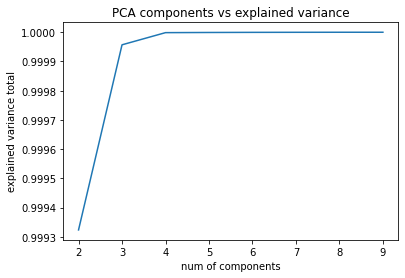

In [704]:
variance = []
for num_components in range(2,len(x_train.columns)):
    #print('Aplying PCA with',num_components,'components:')
    pca = PCA(n_components=num_components)
    pca.fit(x_train)
    #print('explained variance ratio:',np.sum(pca.explained_variance_ratio_))
    variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure()
plt.plot(range(2,len(x_train.columns)),variance)
plt.xlabel('num of components')
plt.ylabel('explained variance total')
plt.title('PCA components vs explained variance')
plt.show()

Note that only 4 variables can be used to explain all the information in this case. Hence we will use PCA again this time with 4 number of components.

In [705]:
pca = PCA(n_components=4)
x_train_pca = pca.fit_transform(x_train)
x_train_pca = pd.DataFrame(x_train_pca)
x_train_pca.head()

,0,1,2,3
0,2903.365281,-51.022977,41.324653,13.154232
1,1230.332919,-56.916638,-0.033507,7.266767
2,2140.415212,-43.990124,103.568968,12.321205
3,74.296062,-63.402558,-48.839101,-4.457735
4,-1827.690166,-62.730581,-34.441915,-16.999089


### Shortlist classification models

In [706]:
# use x_train_sm and y_train_sm for balanced classes.

In [707]:
classifiers = {
    "Logistics Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

model = classifiers["Decision Tree"]
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [708]:
def calculate_performance(y_true, y_pred):
    print(sklearn.metrics.classification_report(y_true, y_pred))
    print("roc_auc_score: ", sklearn.metrics.roc_auc_score(y_true, y_pred))
    print("f1 score: ", sklearn.metrics.f1_score(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3625
           1       0.95      0.90      0.93       375

    accuracy                           0.99      4000
   macro avg       0.97      0.95      0.96      4000
weighted avg       0.99      0.99      0.99      4000

roc_auc_score:  0.9483218390804597
f1 score:  0.9260273972602739


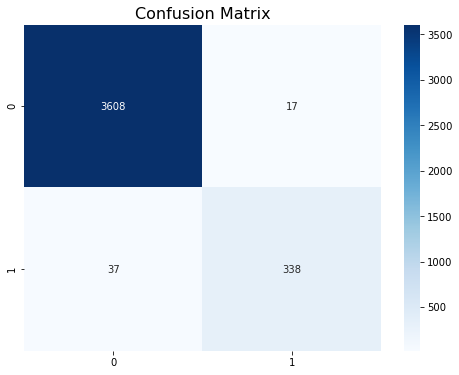

In [709]:
# calculating the classification accuracy on whole train set
y_pred = model.predict(x_train)
calculate_performance(y_train, y_pred)

### Shortlist regression models

In [710]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()

# model.fit(train_copy, train_label)

# testing on train dataset 
# train_data_subset = train_copy.iloc[:5] # for example take 5
# train_data_subset_labels = train_label.iloc[:5]

# train_subset_prepared = fullpipeline.transform(train_copy_subset)
# print("Predictions:", model.predict(train_subset_prepared))
# print("Labels:", train_data_subset_labels)

# # calculating the mean squared error on whole train set
# train_copy_predictions = model.predict(train_copy_prepared)
# model_mse = mean_squared_error(train_labels, train_copy_predictions)
# model_rmse = np.sqrt(model_mse)
# print("RMSE on train dataset:", model_rmse)

Sometimes you will notice that the model's score on the train dataset is ~ 100% or unusually high. This indicates that the model has overfit the data. To confirm this a model can be tested on the test dataset(unseen), but we can not do it as the model will see the test data in this case.

To avoid this K-Fold cross validation strategy can be used where a dataset is divided into k folds and a model is trained on k-1 fold and tested on 1 fold with k number of iterations and each iterations test set being different.

#### Cross Validation

In [711]:
# uncomment below line to know available scoring metrics
#sorted(sklearn.metrics.SCORERS.keys())

In [712]:
def auc_score(y_true,y_pred):
    return roc_auc_score(y_true,y_pred)

score = make_scorer(auc_score, greater_is_better=True)

In [713]:
# here scoring parameter can be used to specify the custom scoring metrics type
# for regression we can use scoring = "neg_mean_squared_error"
# for classification we can use scoring = "f1_macro"
# by default it uses the estimator scoring parameter

scores = cross_val_score(model, x_train, y_train, scoring = score, cv=5)

# below is only for regression models when scoring = "neg_mean_squared_error"
# scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())

display_scores(scores)

Scores: [0.96183908 0.92045977 0.93770115 0.94390805 0.93057471]
Mean: 0.9388965517241379
Standard Deviation 0.013871348945753061


### Save model frequently
* a good idea is to save model so that you do not need to retrain and model can be compared easily.
* Joblib library can be used for this purpose.

In [714]:
# joblib.dump(model, "model.pkl")

# ... and later
# model_loaded = joblib.load("model.pkl")

## <font color='royalblue'><u>7: Fine Tune your shortlisted models</u></font>

### 7.1.Grid Search
There are a lot of hyperparameter values which you need to evaluated. This will be a tedious task if you have to run it every time with different hyperparameter values. Grid Search will help here by automating this process, essentially it will try out each and every combination(searching in grid/matrix) and will present a list of hyperparameter for which model performed best.

In [715]:
# create a params_grid like below
param_grid={'max_depth':[2, 3, 4, 5, 8, 10, 20, None],'max_features':['sqrt','log2',None],'class_weight':['balanced']}

# take your shortlisted model here, i.e you want to hypertune that model more
grid_search = GridSearchCV(model, param_grid, cv=5, scoring= score, return_train_score = True)
grid_search.fit(x_train, y_train)

print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

best estimator DecisionTreeClassifier(class_weight='balanced', max_depth=3)
best score 0.9576091954022988


evaluation scores are also available

In [716]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(mean_score, params)

0.7476321839080459 {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 'sqrt'}
0.7929655172413794 {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 'log2'}
0.8852413793103449 {'class_weight': 'balanced', 'max_depth': 2, 'max_features': None}
0.8479540229885056 {'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'sqrt'}
0.8687356321839081 {'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'log2'}
0.9576091954022988 {'class_weight': 'balanced', 'max_depth': 3, 'max_features': None}
0.8951724137931034 {'class_weight': 'balanced', 'max_depth': 4, 'max_features': 'sqrt'}
0.8925057471264367 {'class_weight': 'balanced', 'max_depth': 4, 'max_features': 'log2'}
0.9461149425287356 {'class_weight': 'balanced', 'max_depth': 4, 'max_features': None}
0.8851494252873563 {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt'}
0.8580689655172413 {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'log2'}
0.9534252873563218 {'class_weight': 'b

*At this moment, you have successfully fine tuned your model*

NOTE: Do note that we can treat some of the data preapration steps also as a hyperparameter. For eg. having a combined/engineered attribute will help or not, to automatically find a best way of handling outliers, feature selection and more. The transformers can be developed accordingly and can be used as a hyper parameters.

Use the hyper tuned parameters and create a final model

In [717]:
final_model = grid_search.best_estimator_
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3625
           1       0.95      0.90      0.93       375

    accuracy                           0.99      4000
   macro avg       0.97      0.95      0.96      4000
weighted avg       0.99      0.99      0.99      4000

roc_auc_score:  0.9483218390804597
f1 score:  0.9260273972602739


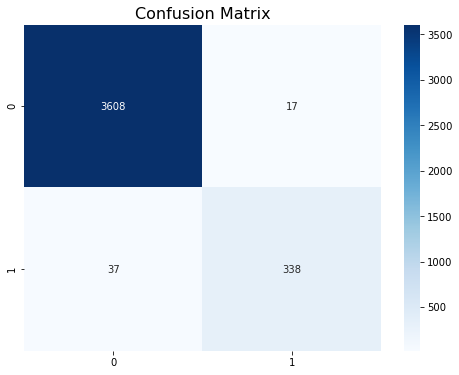

In [718]:
y_pred = model.predict(x_train)
calculate_performance(y_train, y_pred)

NOTE: The model performance is low as we can see the model can detect only 371 correctly and 258 incorrectly. <br/>
We can try using engineered features to improve this performance.

### 7.2.Randomized Search
* Using Grid Search is fine when you have comparatively less combinations of hyperparmeter values to test. But what if we have a large number of combinations? in this case instead of evaluating each and every combination from a large search space, randomized search approach can be used which will evaluate the combinatiosn by taking the random values for a hyperparameter at every iterations.

This approach has two main benefits
1. if we let the randomized search to run for 1000 iterations, then it will explore 1000 different values for a hyperparamter instead of just few values of a hyperparameter with the grid search approach.
2. Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

### 7.3. Ensemble methods
This is one another way of fine tuning your models. Often a group of models will perform best as compared to just usin a single model such as Random Forest over Decision Trees. 

### 7.4. Analyze the best models and their errors
you will gain good insights when you inspect the models. For example RandomForest models can indicate the relative importance of each attribute for making accurate predictions.

In [719]:
# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances

Let's display these importance scores beside the attributes/

In [720]:
# attributes = numerical_attrib + cat_attrib + extra_attrib

# # Do apply transformations on it based on the transformation pipeline you created before
# sorted(zip(feature_importances, attributes), reverse=True)

With information from above, you can try inspecting the contribution from each attributes and you can decide to drop few of those which seems to contribtue less in the models prediction.

*At this moment, you have successfully fine tuned your model*

NOTE: Do note that we can treat some of the data preapration steps also as a hyperparameter. For eg. having a combined/engineered attribute will help or not, to automatically find a best way of handling outliers, feature selection and more. The transformers can be developed accordingly and can be used as a hyper parameters.

## <font color='royalblue'><u>8. Evaluate your model on the test set</u></font>

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       895
           1       0.61      0.97      0.75       105

    accuracy                           0.93      1000
   macro avg       0.80      0.95      0.86      1000
weighted avg       0.96      0.93      0.94      1000

roc_auc_score:  0.9494014365522746
f1 score:  0.75


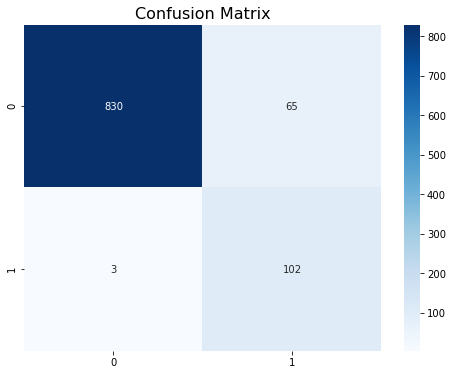

In [721]:
final_pred = final_model.predict(x_test)

# use below for classifiers
calculate_performance(y_test, final_pred)

## use below for regressors
# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)